<a href="https://colab.research.google.com/github/MAR123EREE/Laboratorio_02/blob/main/Final_COLORyPSICOLOG%C3%8DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***LA PSICOLGÍA DEL COLOR***

Crear un dataset relacionado con la psicología del color

In [ ]:
import pandas as pd
import numpy as np
from random import randint, choice

# Asignar rangos de colores a emociones específicas
emotion_color_map = {
    "Alegría": [(255, 200, 0), (255, 255, 0), (255, 165, 0)],    # Amarillos, naranjas
    "Tristeza": [(0, 0, 128), (70, 130, 180), (135, 206, 235)],  # Azules
    "Amor": [(255, 0, 0), (255, 20, 147), (255, 105, 180)],      # Rojos, rosas
    "Miedo": [(0, 0, 0), (64, 64, 64), (128, 0, 128)],           # Negros, púrpuras oscuros
    "Enfado": [(139, 0, 0), (165, 42, 42), (255, 69, 0)],        # Rojos intensos, marrones
    "Sorpresa": [(255, 215, 0), (255, 140, 0), (255, 239, 213)], # Amarillos brillantes
    "Paz": [(144, 238, 144), (173, 216, 230), (152, 251, 152)],  # Verdes suaves
    "Creatividad": [(75, 0, 130), (238, 130, 238), (123, 104, 238)], # Morados
    "Melancolía": [(47, 79, 79), (105, 105, 105), (112, 128, 144)],  # Grises
    "Asco": [(85, 107, 47), (128, 128, 0), (107, 142, 35)]        # Verdes oscuros
}

# Generar dataset basado en estas asignaciones
def generate_precise_dataset(size=3000):
    data = []
    emotions = list(emotion_color_map.keys())
    for _ in range(size):
        emotion = choice(emotions)
        r, g, b = choice(emotion_color_map[emotion])  # Escoger un color para esa emoción
        hex_color = f"#{r:02X}{g:02X}{b:02X}"
        data.append({"Emoción": emotion, "Color": hex_color, "R": r, "G": g, "B": b})
    return pd.DataFrame(data)

# Crear y guardar el dataset
df = generate_precise_dataset(size=3000)
df.to_csv("emociones_colores_precisos.csv", index=False)
print("Dataset generado y guardado como 'emociones_colores_precisos.csv'.")


Dataset generado y guardado como 'emociones_colores_precisos.csv'.


In [ ]:
# Revisar la distribución de las emociones
print(df['Emoción'].value_counts())

Emoción
Alegría        332
Asco           324
Melancolía     309
Amor           302
Creatividad    296
Miedo          295
Sorpresa       292
Enfado         292
Tristeza       291
Paz            267
Name: count, dtype: int64


# *Dividir los datos de entrenamiento y prueba, luego entrenar el modelo de redes neuronales*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("emociones_colores_precisos.csv")

# Codificar emociones (one-hot encoding)
encoder = OneHotEncoder(sparse_output=False)
encoded_emotions = encoder.fit_transform(df[['Emoción']])

# Preparar las características de entrada y salidas
X = df[['R', 'G', 'B']].values / 255  # Normalización
y = encoded_emotions

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la red neuronal
model = Sequential([
    Dense(256, input_dim=3, activation='relu'),  # Más neuronas en la capa inicial
    Dense(128, activation='relu'),               # Capa intermedia
    Dense(y.shape[1], activation='softmax')      # Salida
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo y guardar el historial
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_split=0.2
)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión del modelo: {accuracy:.2f}")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3329 - loss: 2.1478 - val_accuracy: 0.6500 - val_loss: 1.4249
Epoch 2/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6957 - loss: 1.2443 - val_accuracy: 0.8646 - val_loss: 0.7266
Epoch 3/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8856 - loss: 0.6369 - val_accuracy: 0.8750 - val_loss: 0.4359
Epoch 4/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9211 - loss: 0.3851 - val_accuracy: 0.9438 - val_loss: 0.2846
Epoch 5/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9371 - loss: 0.2813 - val_accuracy: 0.9417 - val_loss: 0.2213
Epoch 6/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9285 - loss: 0.2426 - val_accuracy: 0.9729 - val_loss: 0.1749
Epoch 7/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9447 - loss: 0.1858 - val_accuracy: 0.9729 - val_loss: 0.1600
Epoch 8/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9570 - loss: 0.1636 - val_accuracy: 0.9729 - v

# VIZUALIZAR LA PRECISIÓN Y PÉRDIDA

Graficar precisión, pérdida, y luego visualizarlo

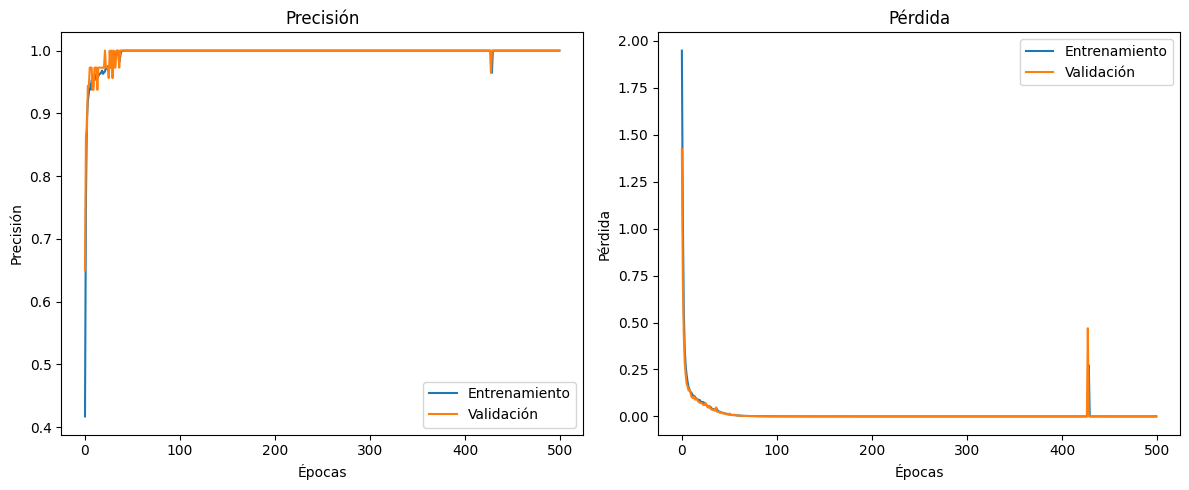

In [ ]:
# Graficar la precisión y la pérdida
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()
# Visualiza el gráfico en pantalla.


Crear una función que ayude a predecir que tipo de emoción es

In [ ]:
import pandas as pd
import numpy as np
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# ... (código anterior para generar, entrenar y evaluar el modelo)...

# Función para predecir la emoción a partir de un color
def predict_emotion_from_color(hex_color):
    """Predice la emoción asociada a un color HEX.

    Args:
        hex_color (str): El color en formato hexadecimal (ej. "#FFA500").

    Returns:
        str: La emoción predicha.
    """
    r = int(hex_color[1:3], 16)
    g = int(hex_color[3:5], 16)
    b = int(hex_color[5:7], 16)
    color_array = np.array([[r / 255, g / 255, b / 255]])  # Normalizar y convertir a array

    # Obtener la predicción del modelo
    prediction = model.predict(color_array)

    # Encontrar el índice de la emoción con mayor probabilidad
    emotion_index = np.argmax(prediction)

    # Obtener el nombre de la emoción usando el encoder
    predicted_emotion = encoder.categories_[0][emotion_index]

    return predicted_emotion


# Probar con un color
test_color = "#FFA500"  # Un naranja brillante
predicted_emotion = predict_emotion_from_color(test_color)
print(f"El color {test_color} está asociado con la emoción: {predicted_emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
El color #FFA500 está asociado con la emoción: Alegría


# Visualización del Aprendizaje
Se puede agregar resultados visuales que ayuden a interpretar el aprendizaje del modelo. Por ejemplo:

Muestra de colores: Mostrar los colores de entrada junto con su predicción.

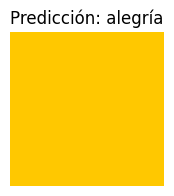

In [1]:
import matplotlib.pyplot as plt

# Supongamos que predices una emoción
prediccion = "alegría"
color_rgb = (255, 200, 0)  # Color en formato RGB

plt.figure(figsize=(2, 2))
plt.imshow([[color_rgb]])
plt.title(f"Predicción: {prediccion}", fontsize=12)
plt.axis('off')
plt.show()